# Imports

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [61]:
# Image paths
image_path = 'Pictures/4810_V.jpeg'
image_folder = Path('Pictures/')

In [62]:
list(image_folder.glob('*.jpeg'))

[WindowsPath('Pictures/2310_V.jpeg'),
 WindowsPath('Pictures/2500_V.jpeg'),
 WindowsPath('Pictures/2700_V.jpeg'),
 WindowsPath('Pictures/2900_V.jpeg'),
 WindowsPath('Pictures/3100_V.jpeg'),
 WindowsPath('Pictures/3300_V.jpeg'),
 WindowsPath('Pictures/3480_V.jpeg'),
 WindowsPath('Pictures/3690_V.jpeg'),
 WindowsPath('Pictures/3910_V.jpeg'),
 WindowsPath('Pictures/4100_V.jpeg'),
 WindowsPath('Pictures/4310_V.jpeg'),
 WindowsPath('Pictures/4500_V.jpeg'),
 WindowsPath('Pictures/4810_V.jpeg')]

In [63]:
# Load the image
image = cv2.imread(image_path)

if image is None:
    print('Could not open or find the image: ', image_path)

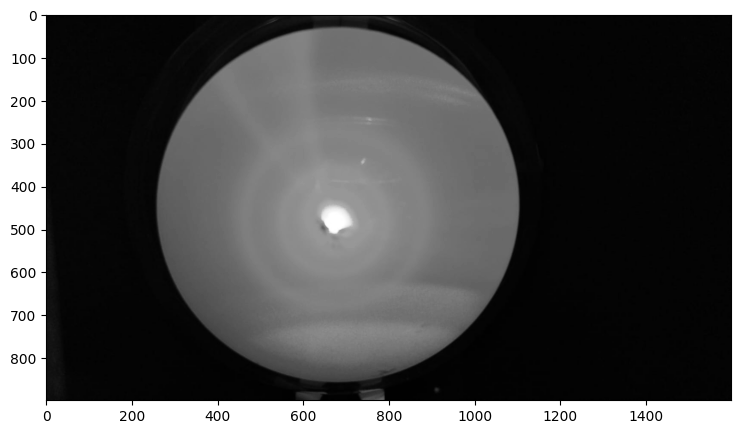

In [64]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization to enhance contrast
equalized = cv2.equalizeHist(gray)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (15, 9), 2)

# Apply Canny edge detection
edges = cv2.Canny(blurred, threshold1=40, threshold2=10)

# Show gray image
plt.figure(figsize=(10, 5))
plt.imshow(gray, cmap='gray')

In [65]:
minDist = 100
param1 = 50
param2 = 30
minRadius = 0
maxRadius = 0

circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist=minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

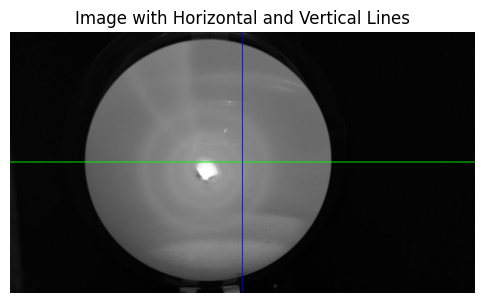

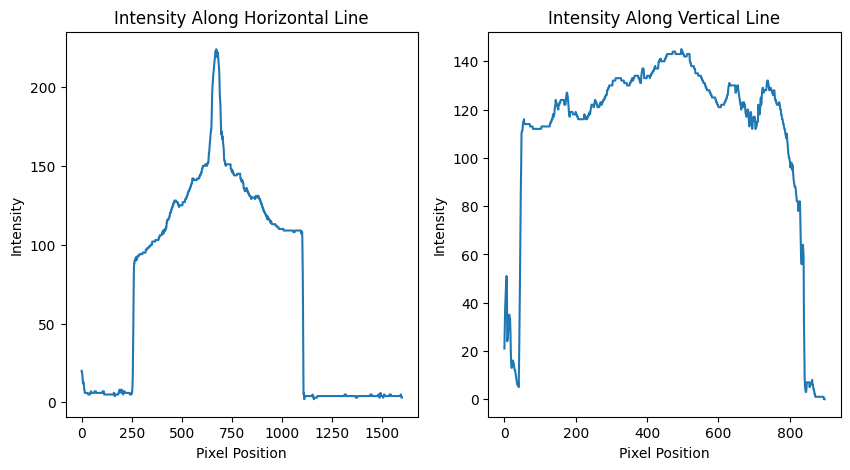

Horizontal Radii (pixels): []
Vertical Radii (pixels): []
Horizontal Radii (cm): []
Vertical Radii (cm): []


In [66]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Check if image was loaded
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Get the image dimensions and center point
    height, width = image.shape
    center_x, center_y = width // 2, height // 2
    
	 # Draw horizontal and vertical lines on the image
    image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color drawing
    cv2.line(image_with_lines, (0, center_y), (width, center_y), (0, 255, 0), 2)  # Horizontal line (green)
    cv2.line(image_with_lines, (center_x, 0), (center_x, height), (255, 0, 0), 2)  # Vertical line (blue)

    # Show the image with the lines drawn
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))  # Convert to RGB for plotting
    plt.title("Image with Horizontal and Vertical Lines")
    plt.axis('off')  # Hide axes
    plt.show()

    # Extract horizontal and vertical lines passing through the center
    horizontal_line = image[center_y, :]  # All pixels in the row at the image center
    vertical_line = image[:, center_x]    # All pixels in the column at the image center

    # Plot the pixel intensities along the horizontal and vertical lines
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(horizontal_line)
    plt.title("Intensity Along Horizontal Line")
    plt.xlabel("Pixel Position")
    plt.ylabel("Intensity")

    plt.subplot(1, 2, 2)
    plt.plot(vertical_line)
    plt.title("Intensity Along Vertical Line")
    plt.xlabel("Pixel Position")
    plt.ylabel("Intensity")

    plt.show()

    # Compute intensity differences (for detecting jumps)
    horizontal_diff = np.diff(horizontal_line)
    vertical_diff = np.diff(vertical_line)

    # Detect peaks in intensity differences (intensity jumps)
    horizontal_jumps = np.where(np.abs(horizontal_diff) > np.percentile(np.abs(horizontal_diff), 95))[0]
    vertical_jumps = np.where(np.abs(vertical_diff) > np.percentile(np.abs(vertical_diff), 95))[0]

    # Calculate radii based on pixel distances from the center
    horizontal_radii = np.abs(horizontal_jumps - center_x)
    vertical_radii = np.abs(vertical_jumps - center_y)

    # Convert pixel distances to real distances (using your pixel-to-cm conversion factor)
    pixel_to_cm = 0.01  # Example: replace with your actual value
    horizontal_radii_cm = horizontal_radii * pixel_to_cm
    vertical_radii_cm = vertical_radii * pixel_to_cm

    print(f"Horizontal Radii (pixels): {horizontal_radii}")
    print(f"Vertical Radii (pixels): {vertical_radii}")
    print(f"Horizontal Radii (cm): {horizontal_radii_cm}")
    print(f"Vertical Radii (cm): {vertical_radii_cm}")


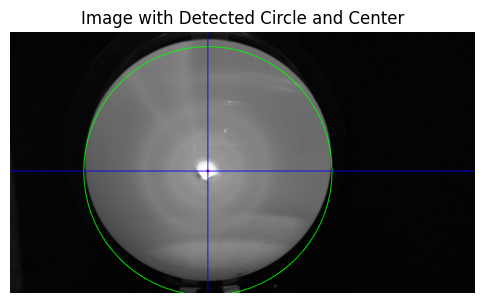

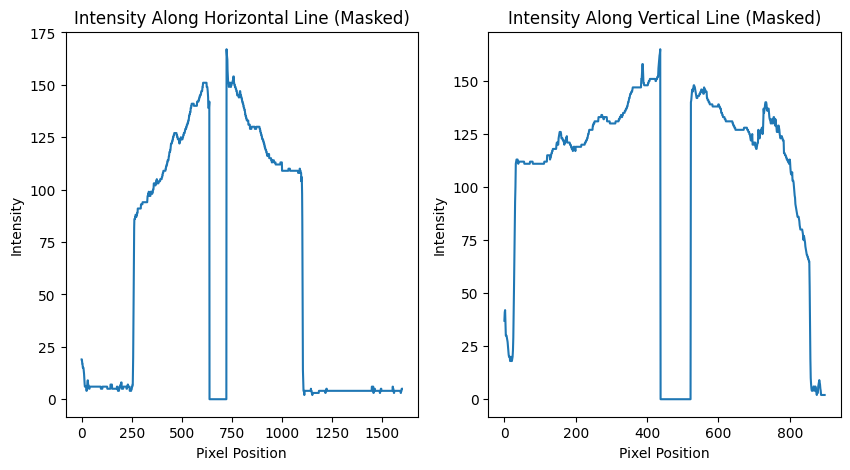

Horizontal Radii (pixels): []
Vertical Radii (pixels): []
Horizontal Radii (cm): []
Vertical Radii (cm): []


In [77]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Check if image was loaded
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Blur the image slightly to reduce noise and help with bright spot
    blurred_image = cv2.GaussianBlur(image, (9, 9), 2)

    # Apply Hough Circle Transform to detect the main circle (lamp edge)
    circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=1.5, minDist=100,
                               param1=50, param2=30, minRadius=300, maxRadius=500)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        center_x, center_y, radius = circles[0, 0]  # Get the first detected circle's center and radius
        center_y = center_y + 50
        
        # Mask the central bright spot (if it's smaller than the radius of the detected lamp edge)
        mask = np.zeros_like(image)
        cv2.circle(mask, (center_x, center_y), int(0.1 * radius), 255, thickness=-1)  # Mask a portion of the bright spot
        masked_image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))

        # Draw the detected circle and its center
        image_with_circle = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        cv2.circle(image_with_circle, (center_x, center_y), radius, (0, 255, 0), 2)  # Lamp edge (green)
        cv2.circle(image_with_circle, (center_x, center_y), 5, (0, 0, 255), -1)  # Center (red)

        # Draw horizontal and vertical lines through the detected center
        cv2.line(image_with_circle, (0, center_y), (image.shape[1], center_y), (255, 0, 0), 2)  # Horizontal line (blue)
        cv2.line(image_with_circle, (center_x, 0), (center_x, image.shape[0]), (255, 0, 0), 2)  # Vertical line (blue)

        # Show the image with the detected circle and lines drawn
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(image_with_circle, cv2.COLOR_BGR2RGB))
        plt.title("Image with Detected Circle and Center")
        plt.axis('off')
        plt.show()

        # Extract intensity along the masked horizontal and vertical lines
        horizontal_line = masked_image[center_y, :]  # All pixels in the row at the detected center
        vertical_line = masked_image[:, center_x]    # All pixels in the column at the detected center

        # Plot the pixel intensities along the horizontal and vertical lines
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(horizontal_line)
        plt.title("Intensity Along Horizontal Line (Masked)")
        plt.xlabel("Pixel Position")
        plt.ylabel("Intensity")

        plt.subplot(1, 2, 2)
        plt.plot(vertical_line)
        plt.title("Intensity Along Vertical Line (Masked)")
        plt.xlabel("Pixel Position")
        plt.ylabel("Intensity")

        plt.show()

        # Compute intensity differences (for detecting jumps)
        horizontal_diff = np.diff(horizontal_line)
        vertical_diff = np.diff(vertical_line)

        # Detect peaks in intensity differences (intensity jumps)
        horizontal_jumps = np.where(np.abs(horizontal_diff) > np.percentile(np.abs(horizontal_diff), 95))[0]
        vertical_jumps = np.where(np.abs(vertical_diff) > np.percentile(np.abs(vertical_diff), 95))[0]

        # Calculate radii based on pixel distances from the detected center
        horizontal_radii = np.abs(horizontal_jumps - center_x)
        vertical_radii = np.abs(vertical_jumps - center_y)

        # Convert pixel distances to real distances (using your pixel-to-cm conversion factor)
        pixel_to_cm = 0.01  # Example: replace with your actual value
        horizontal_radii_cm = horizontal_radii * pixel_to_cm
        vertical_radii_cm = vertical_radii * pixel_to_cm

        print(f"Horizontal Radii (pixels): {horizontal_radii}")
        print(f"Vertical Radii (pixels): {vertical_radii}")
        print(f"Horizontal Radii (cm): {horizontal_radii_cm}")
        print(f"Vertical Radii (cm): {vertical_radii_cm}")

    else:
        print("No circles detected. Please check the image or try adjusting parameters.")


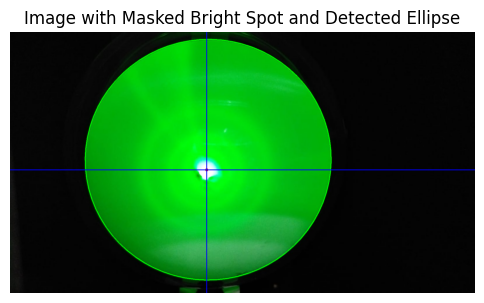

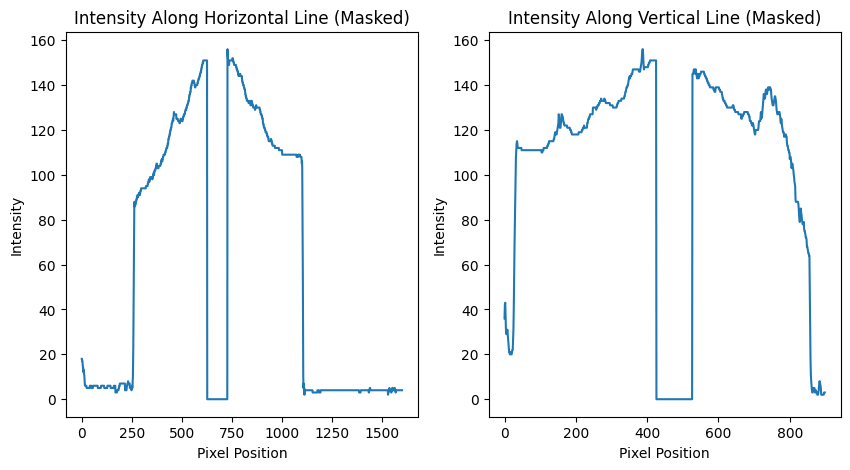

In [89]:
image = cv2.imread(image_path)

# Check if image was loaded
if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Convert the image to HSV for better color segmentation (green detection)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define the HSV range for detecting the green contour
    lower_green = np.array([35, 100, 100])  # Adjust the range as needed
    upper_green = np.array([85, 255, 255])
    
    # Threshold the image to get only the green color
    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour, assuming it's the lamp edge
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        # Fit an ellipse to the contour
        if len(largest_contour) >= 5:  # Need at least 5 points to fit an ellipse
            offset_x = -5
            offset_y = 35
            ellipse = cv2.fitEllipse(largest_contour)
            center = (int(ellipse[0][0]+offset_x), int(ellipse[0][1])+offset_y)  # Center of the ellipse
            axes = (int(ellipse[1][0] // 2), int(ellipse[1][1] // 2))  # Semi-major and semi-minor axes
            angle = int(ellipse[2])  # Rotation angle of the ellipse


            # Mask out the bright spot in the center
            # Define the radius of the mask based on the size of the bright spot
            mask_radius = 50  # Adjust this based on the size of the bright spot
            bright_mask = np.zeros(image.shape[:2], dtype=np.uint8)
            cv2.circle(bright_mask, center, mask_radius, 255, -1)  # Mask the bright spot
            
            # Invert the mask to keep everything except the bright spot
            inverse_bright_mask = cv2.bitwise_not(bright_mask)

            # Apply the mask to the grayscale image
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            masked_image = cv2.bitwise_and(gray_image, gray_image, mask=inverse_bright_mask)

            # Draw the ellipse and lines on the original image
            image_with_ellipse = image.copy()
            cv2.ellipse(image_with_ellipse, ellipse, (0, 255, 0), 2)  # Draw the green ellipse
            cv2.circle(image_with_ellipse, center, 5, (0, 0, 255), -1)  # Red dot at the center
            cv2.line(image_with_ellipse, (0, center[1]), (image.shape[1], center[1]), (255, 0, 0), 2)  # Horizontal line
            cv2.line(image_with_ellipse, (center[0], 0), (center[0], image.shape[0]), (255, 0, 0), 2)  # Vertical line

            # Show the image with the ellipse and lines
            plt.figure(figsize=(6, 6))
            plt.imshow(cv2.cvtColor(image_with_ellipse, cv2.COLOR_BGR2RGB))
            plt.title("Image with Masked Bright Spot and Detected Ellipse")
            plt.axis('off')
            plt.show()

            # Extract intensity along the horizontal and vertical lines (ignoring the masked region)
            horizontal_line = masked_image[center[1], :]  # All pixels in the row at the ellipse center
            vertical_line = masked_image[:, center[0]]    # All pixels in the column at the ellipse center

            normalized_horizontal_line = (horizontal_line - np.min(horizontal_line)) / (np.max(horizontal_line) - np.min(horizontal_line))
            normalized_vertical_line = (vertical_line - np.min(vertical_line)) / (np.max(vertical_line) - np.min(vertical_line))

            log_horizontal_line = np.log(normalized_horizontal_line + 1)
            log_vertical_line = np.log(normalized_vertical_line + 1)

            # Plot the pixel intensities along the horizontal and vertical lines
            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            plt.plot(horizontal_line)
            plt.title("Intensity Along Horizontal Line (Masked)")
            plt.xlabel("Pixel Position")
            plt.ylabel("Intensity")

            plt.subplot(1, 2, 2)
            plt.plot(vertical_line)
            plt.title("Intensity Along Vertical Line (Masked)")
            plt.xlabel("Pixel Position")
            plt.ylabel("Intensity")

            plt.show()

        else:
            print("Not enough points to fit an ellipse.")
    else:
        print("No contours detected. Please check the image or adjust the color range.")


In [91]:
horizontal_diffs = np.diff(horizontal_line)
vertical_diffs = np.diff(vertical_line)

# Detect peaks in intensity differences (jumps)
horizontal_peaks = np.where(np.abs(horizontal_diffs) > np.percentile(np.abs(horizontal_diffs), 95))[0]
vertical_peaks = np.where(np.abs(vertical_diffs) > np.percentile(np.abs(vertical_diffs), 95))[0]

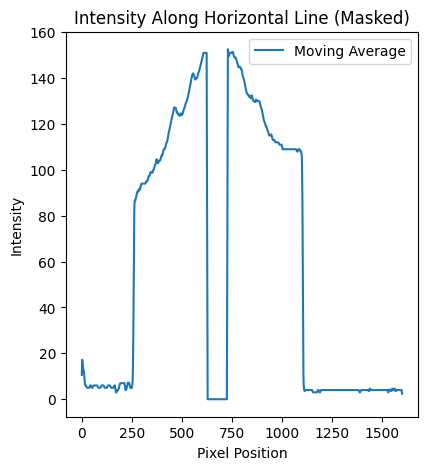

In [98]:
ma_horizontal = np.convolve(horizontal_line, np.ones(5) / 5, mode='same')
ma_vertical = np.convolve(vertical_line, np.ones(10) / 10, mode='same')

# Plot the pixel intensities along the horizontal and vertical lines
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# plt.plot(horizontal_line, label='Original')
plt.plot(ma_horizontal, label='Moving Average', linestyle='-')
plt.title("Intensity Along Horizontal Line (Masked)")
plt.xlabel("Pixel Position")
plt.ylabel("Intensity")
plt.legend()


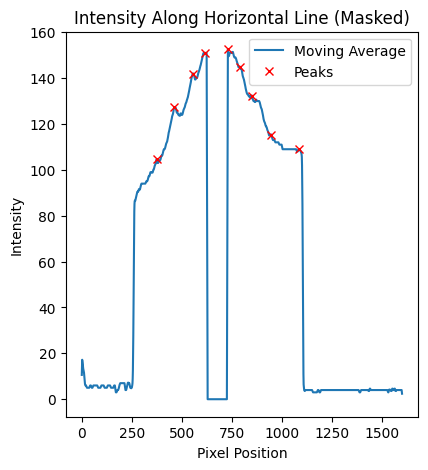

In [101]:
from scipy.signal import find_peaks

# Find peaks in the moving average intensity profiles
horizontal_peaks, _ = find_peaks(ma_horizontal, height=100, distance=50)
vertical_peaks, _ = find_peaks(ma_vertical, height=0)

# Plot the pixel intensities along the horizontal and vertical lines
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ma_horizontal, label='Moving Average', linestyle='-')
plt.plot(horizontal_peaks, ma_horizontal[horizontal_peaks], 'x', label='Peaks', color='red')
plt.title("Intensity Along Horizontal Line (Masked)")
plt.xlabel("Pixel Position")
plt.ylabel("Intensity")
plt.legend()

In [102]:
try:
	erros 

except Exception as e:
	print(e)

name 'erros' is not defined
